In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
inspector = inspect(engine)
columns = inspector.get_columns("Station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the most recent date in the data set.
Earliest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Earliest_date

('2017-08-23',)

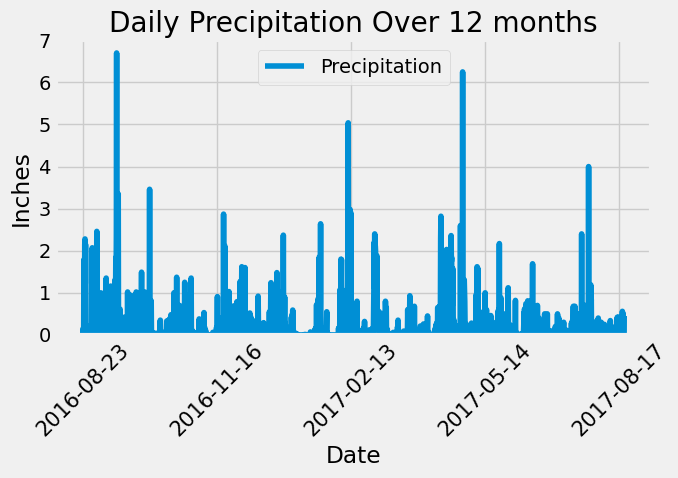

In [121]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
filter_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(filter_data, columns=['date', 'prcp'])
df_clean = df.rename(columns={'prcp': 'Precipitation'})
df_clean = df_clean.dropna(axis=0, how="any")

# Sort the dataframe by date
df_clean.set_index('date', inplace=True)
prcp_plot = df_clean.plot(figsize=(7,5), ylim=(0,7), title = "Daily Precipitation Over 12 months", rot=90)
plt.locator_params(axis='x', nbins=6)
plt.xticks(rotation=45, size=15)

# Use Pandas Plotting with Matplotlib to plot the data
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.savefig("Images/Daily_Precipitation.png")
plt.show()

In [98]:
# Use Pandas to calculate the summary statistics for the precipitation data
Describe= df_clean.describe()
Describe

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [101]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).first()
station_count

(9,)

In [113]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [118]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
select=[func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)
       ]
first_station_id = session.query(*select).\
    filter(Measurement.station == "USC00519281").all()
first_station_id

[(54.0, 85.0, 71.66378066378067)]

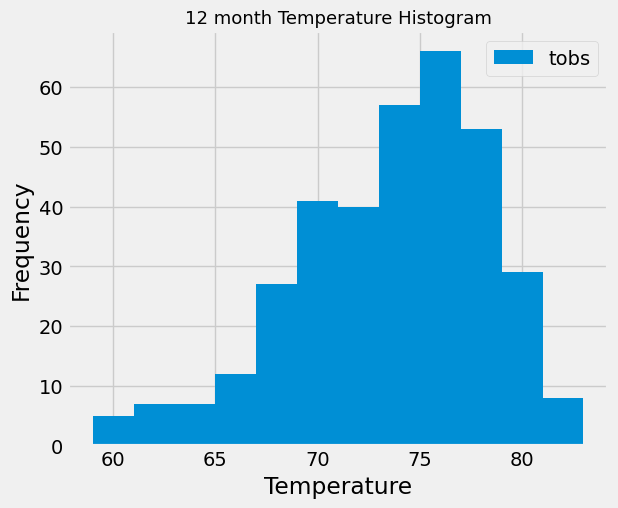

In [122]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>='2016-08-23').all()

#Plot results
high_station_temp=pd.DataFrame(results,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 month Temperature Histogram", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("Images/histogram_tobs.png")
plt.show()

# Close Session

In [120]:
# Close Session
session.close()